# Polynomial(多項式) Regression with SciKit-Learn


### 從數據預處理中導入 PolynomialFeatures，這將幫助我們通過添加多項式特徵來轉換原始數據集

我們將從以下形式的方程開始（這裡假設我們只有一個 x 特徵）：

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

然後，為某個多項式的度數 \(d\)，從原始的 x 特徵創建更多的特徵。

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_1^2 +  \ldots + \beta_dx_1^d + \epsilon$$

接著我們可以對這些新生成的多項式特徵進行線性回歸，因為實際上，我們只是將這些新的多項式特徵 $(x^2, x^3, \ldots, x^d) $ 當作新的特徵來處理。顯然，我們需要謹慎選擇正確的多項式度數 \(d\)（模型的度數），測試集上的指標結果將幫助我們確定這一點！

這種方法可以幫助我們擴展模型的表達能力，捕捉到數據中的非線性關係，從而提高模型的預測精度。


當使用 `PolynomialFeatures` 模塊時，如果將參數 `degree=2` 與 `include_bias=False` 設定，表示我們想生成二次多項式特徵，但不包括常數項（也就是截距項）。下面將用 LaTeX 格式詳細說明這一轉換過程：

### 原始特徵


$ \text{假設我們的原始特徵為}X=[x_1,x_2,x_3],$

### 二次多項式特徵

這會生成所有一次項、二次項及交互項的特徵。具體包括：

1.原始特徵的一次項：

$x_1,x_2,x_3$


2. 原始特徵的二次項：
$$x_1^2,x_2^2,x_3^2$$
### 3.原始特徵之間的交互項：
$$x_1x_2,x_1x_3,x_2x_3$$

因此，生成的二次多項式特徵可以表示為：

$X_{\mathrm{poly}}=[x_1,x_2,x_3,x_1^2,x_2^2,x_3^2,x_1x_2,x_1x_3,x_2x_3]$

### 具體公式

若用$\beta$表示回歸係數·用$\epsilon$表示誤差項·則二次多項式回歸模型可以表示為：
$$\hat{y}=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\beta_4x_1^2+\beta_5x_2^2+\beta_6x_3^2+\beta_7x_1x_2+\beta_8x_1x_3+\beta_9x_2x_3+\epsilon $$

由於設置了‘include\_bias=False’,這裡不包括常數項( $\beta_0$ )·因此實際的公式為：
$$\hat{y}=\beta_1x_1+\beta_2x_2+\beta_3x_3+\beta_4x_1^2+\beta_5x_2^2+\beta_6x_3^2+\beta_7x_1x_2+\beta_8x_1x_3+\beta_9x_2x_3+\epsilon $$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Advertising.csv")
df.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
X = df.drop("sales",axis=1)
y = df["sales"]

In [6]:
from sklearn.preprocessing import PolynomialFeatures
#include_bias 是否需要算偏差值
#include_bias=False 因為LinearRegression 會算偏差值
polynomialFeatures  = PolynomialFeatures(degree=2,include_bias=False)
pf = polynomialFeatures.fit_transform(X)
pf

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pf,y,test_size=0.3,random_state=101)

In [8]:
from sklearn.linear_model import LinearRegression
mdoel = LinearRegression(fit_intercept=True)
mdoel.fit(X_train,y_train)

LinearRegression()

In [9]:
test_predict = mdoel.predict(X_test)


In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,test_predict))
print(mean_squared_error(y_test,test_predict))

0.48967980448037096
0.44175055104035904


## Model

L1 和 L2 正則化是兩種常見的正則化技術，用於防止模型過擬合並提高模型的泛化能力。它們在正則化項的計算方式上有所不同，從而對模型的影響也不同。

### L1 正則化（Lasso 回歸）

L1 正則化通過在損失函數中加入模型參數的絕對值之和來進行正則化。其損失函數為：

$[ \text{Loss} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |\beta_j| ]$

其中：
- $( y_i )$ 是實際值。
- $( \hat{y}_i )$ 是預測值。
- $( \beta_j )$ 是模型的回歸係數。
- $( \alpha )$ 是正則化強度的參數。

#### 特點：
- **特徵選擇**：L1 正則化可以使一些回歸係數變為零，從而實現特徵選擇。這對於高維數據中特徵數量多於樣本數的情況特別有用。
- **稀疏性**：L1 正則化會產生稀疏的模型，即只有少數幾個特徵會被選擇，而大部分特徵的係數為零。

### L2 正則化（Ridge 回歸）

L2 正則化通過在損失函數中加入模型參數的平方和來進行正則化。其損失函數為：

$[ \text{Loss} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \beta_j^2 ]$

其中：
- $( y_i )$ 是實際值。
- $( \hat{y}_i )$ 是預測值。
- $( \beta_j )$ 是模型的回歸係數。
- $( \alpha )$ 是正則化強度的參數。

#### 特點：
- **平滑性**：L2 正則化不會使係數變為零，而是讓所有的係數都趨向於較小的值。這有助於防止過擬合，並使模型更加平滑。
- **共線性處理**：L2 正則化對多重共線性問題有較好的處理效果，因為它能夠平滑地縮小回歸係數。

### L1 正則化的範例

L1 正則化（Lasso 回歸）

來減少無相關特徵，並比較不使用 L1 正則化和使用 L1 正則化的模型性能。

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

In [25]:
np.random.seed(42)
X,y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)
print(X.shape)
# np.random.randn 是 NumPy 的一個函數，意思是產生標準常態分佈（平均值0，標準差1）的亂數
# (100, 20) 這個括號裡的數字，是指定產生的資料形狀（也就是「幾列幾行」）
X = np.hstack([X,np.random.randn(100,20)])
print(X.shape)

(100, 10)
(100, 30)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 176.42544323621857


In [37]:
lasso =  Lasso(alpha=0.3)
lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_test)
mseLasso = mean_squared_error(y_test, y_pred_lasso)
print("MSE:", mseLasso)

print(mse - mseLasso)

MSE: 159.06667378029192
17.358769455926648


## 比較不使用 L2 正則化和使用 L2 正則化（Ridge 回歸）的模型性能

In [38]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

In [51]:
# 生成示例數據，添加共線性特徵
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)
print("X:",X[0])



X: [-0.92693047 -1.43014138  1.6324113  -3.24126734 -1.24778318 -1.02438764
  0.13074058 -0.05952536 -0.25256815 -0.44004449]


In [54]:
# 添加共線性特徵（例如，特徵 1 是特徵 0 的線性組合）
# scale「標準差」是 0.01（非常小，數值變動很微小）
X[:,1] = X[:,0] + np.random.normal(scale=0.01,size=100) 
X[:,2] = X[:,0] + np.random.normal(scale=0.01,size=100)
print("new X:",X[0])

new X: [-0.92693047 -0.92196333 -0.94108418 -3.24126734 -1.24778318 -1.02438764
  0.13074058 -0.05952536 -0.25256815 -0.44004449]


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)



MSE: 4138.1553903479635


In [57]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train,y_train)
y_pred_ridge = ridge.predict(X_test)
mseRidge = mean_squared_error(y_test, y_pred_ridge)
print("MSE:", mseRidge)
print(mse - mseRidge)

MSE: 3971.0406287007886
167.11476164717487


### 1. 時間序（Time Series）
**定義：**
- 資料是**按照時間先後順序排列**的，比如每天的氣溫、每小時的股價、每月的銷售額。

**重點特色：**
- 資料之間有**時間的依賴性**（autocorrelation）。
- 預測時**會考慮過去的資料**對未來的影響。
- 常見模型：ARIMA、LSTM、Prophet、季節性分析（seasonality）等。

**使用時機：**
- 想要**預測未來**（forecasting）時，例如：
  - 預測明天的股價
  - 預測下個月的銷售量
  - 預測某城市的未來氣溫走勢
- 資料有**明顯的時間順序性**，**不能打亂**。

---

### 2. 回歸（Regression）
**定義：**
- 研究**一組變數（X）對另一個變數（Y）的影響**，比如用房子的大小、地段、樓層來預測房價。

**重點特色：**
- 資料**不一定有時間順序**。
- 關心的是**變數之間的關係強弱**。
- 常見模型：線性回歸、羅吉斯迴歸、樹模型回歸（比如Random Forest Regressor）。

**使用時機：**
- 想要**了解影響因素**或**預測一個結果**時，例如：
  - 預測一間房子的價格
  - 預測一位學生的考試分數（用平時成績、出席率等變數）
- 資料**可以是靜態的**，不必考慮時間順序。

---

### 簡單對比總結：

| 特點 | 時間序（Time Series） | 回歸（Regression） |
|:-----|:----------------------|:-------------------|
| 資料有無時間順序 | 有，且必須考慮 | 沒有，可以打亂 |
| 預測目標 | 未來的資料點（y_t+1） | 任意一個結果（y） |
| 依賴性 | 資料之間互相影響（時間依賴） | 每筆資料獨立 |
| 常見用途 | 預測未來變化趨勢 | 預測、解釋關係 |


# 時間序
# SARIMA(p,d,q)(P,D,Q)m
# 季節性自迴歸整合移動平均模型
我們終於來到時間序列分析中最有趣的部分之一：季節性。

ARIMA 接受參數 $(p,d,q)$，而 SARIMA 接受 <em>額外</em> 一組參數 $(P,D,Q)m$，這些參數專門描述模型的季節性部分。這裡的 $P$、$D$ 和 $Q$ 分別代表季節性回歸、差分和移動平均係數，$m$ 代表每個季節週期中的數據點（行）數。

pip install pmdarima

In [58]:
import pandas as pd
import numpy as np
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima #自動計算   SARIMAX 最佳參數

In [59]:
df = pd.read_csv("./co2_mm_mlo.csv")
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [61]:
df["date"] = pd.to_datetime(dict(year=df["year"],month=df["month"],day=1))
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [62]:
df.dtypes

year                     int64
month                    int64
decimal_date           float64
average                float64
interpolated           float64
date            datetime64[ns]
dtype: object

In [63]:
df.set_index("date",inplace=True)
df.index.freq = "MS"
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


[Text(0.5, 0, ''), Text(0, 0.5, 'parts per million')]

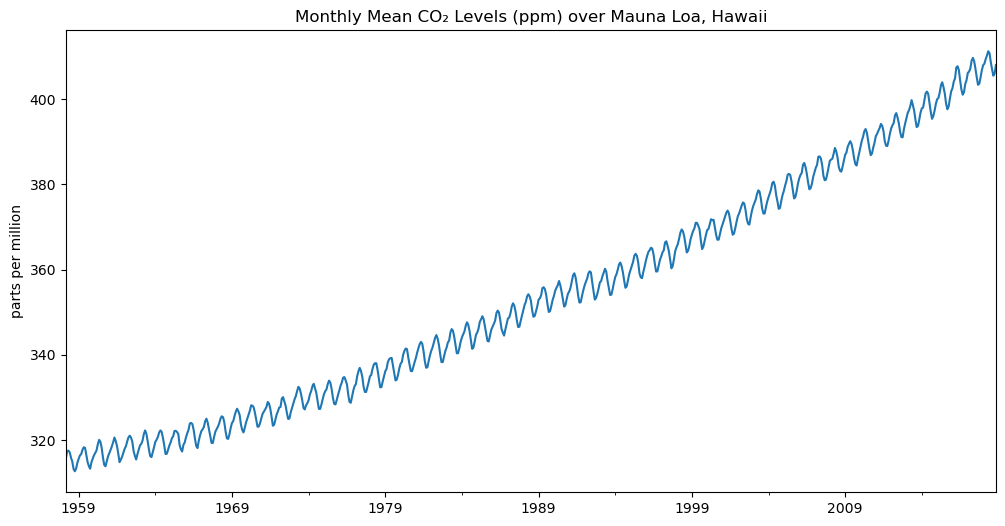

In [64]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel='' # we don't really need a label here

ax = df['interpolated'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

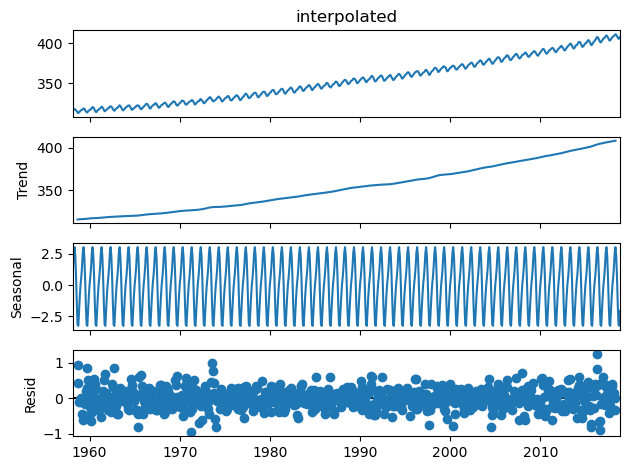

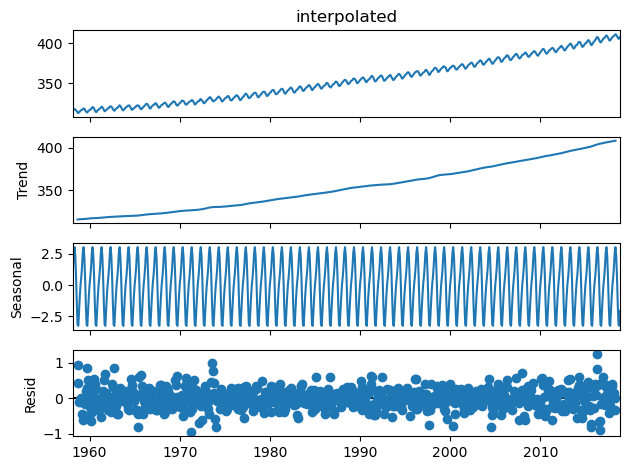

In [65]:
result = seasonal_decompose(df['interpolated'], model='add')
result.plot()

In [66]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -205.685
Date:                              Tue, 29 Apr 2025   AIC                            423.371
Time:                                      21:59:51   BIC                            450.913
Sample:                                  03-01-1958   HQIC                           433.998
                                       - 11-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3564      0.036     -9.859      0.000      -0.427      -0.286
ma.L2         -0.0221      0.036     -0.607      0.544      -0.093       0.049
ma.L3         -0.0856      0.035     -2.424      0.015      -0.155      -0.016
ar.S.L12       0.9996      0.000   3138.111      0.000       0.999       1.000
ma.S.L12      -0.8672      0.021    -41.099      0.000      -0.909      -0.826
sigma2         0.0955      0.005     20.358      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.08
Prob(Q):                              0.79   Prob(JB):                         0.13
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""